In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow
import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D,Dense,BatchNormalization,Flatten,Activation
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from skimage.io import imread
from skimage import transform

In [ ]:
path=r"/content/drive/MyDrive/Datasets/Brain Tumour detection/Final Datasets/train"
print(len(os.listdir(path)))
print(os.listdir(path))

5
['Degenerative disease', 'Inflammatory Disease', 'Normal brain', 'Neoplastic Disease', 'cerebrovascular brain']


In [ ]:
training_data=ImageDataGenerator(rescale=1/255,shear_range=0.02,zoom_range=0.02,rotation_range=40,height_shift_range=[0,0.1],width_shift_range=[0,0.1],horizontal_flip=True,fill_mode="nearest")
validation_data=ImageDataGenerator(rescale=1/255)
testing_data=ImageDataGenerator(rescale=1/255)

In [ ]:
train_data=training_data.flow_from_directory(r"/content/drive/MyDrive/Datasets/Brain Tumour detection/Final Datasets/train",target_size=(224,224),batch_size=16,color_mode="rgb",shuffle=True,class_mode="categorical")
valid_data=validation_data.flow_from_directory(r"/content/drive/MyDrive/Datasets/Brain Tumour detection/Final Datasets/val",target_size=(224,224),batch_size=16,color_mode="rgb",shuffle=True,class_mode="categorical")
test_data=testing_data.flow_from_directory(r"/content/drive/MyDrive/Datasets/Brain Tumour detection/Final Datasets/test",target_size=(224,224),batch_size=1,color_mode="rgb",shuffle=False,class_mode="categorical")

Found 2789 images belonging to 5 classes.
Found 346 images belonging to 5 classes.
Found 354 images belonging to 5 classes.


In [ ]:
model=ResNet50()
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
model=ResNet50(input_shape=(224,224,3),weights="imagenet",include_top=False)
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
for layers in model.layers:
  layers.trainable=False

In [ ]:
tensorflow.random.set_seed(21)

model=tensorflow.keras.models.Sequential([model,
                                         tensorflow.keras.layers.GlobalAveragePooling2D(),
                                         tensorflow.keras.layers.BatchNormalization(),
                                         tensorflow.keras.layers.Dense(2048,activation="relu"),
                                         tensorflow.keras.layers.Dropout(0.5),
                                         tensorflow.keras.layers.BatchNormalization(),
                                         tensorflow.keras.layers.Dense(512,activation="relu"),
                                         tensorflow.keras.layers.BatchNormalization(),
                                         tensorflow.keras.layers.Dense(256,activation="relu"),
                                        tensorflow.keras.layers.BatchNormalization(),
                                          tensorflow.keras.layers.Dense(128,activation="relu"),
                                          tensorflow.keras.layers.Dense(5,activation="softmax")])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_9 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization_10 (Bat  (None, 2048)            

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_9 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization_10 (Bat  (None, 2048)            

In [ ]:
opt=Adam(learning_rate=1e-5)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(train_data,validation_data=(test_data),epochs=100,batch_size=8)

Epoch 1/100
175/175 [==============================] - 77s 395ms/step - loss: 2.1056 - accuracy: 0.2180 - val_loss: 1.6136 - val_accuracy: 0.2401
Epoch 2/100
175/175 [==============================] - 64s 366ms/step - loss: 1.8593 - accuracy: 0.2919 - val_loss: 1.4623 - val_accuracy: 0.4181
Epoch 3/100
175/175 [==============================] - 66s 375ms/step - loss: 1.7337 - accuracy: 0.3381 - val_loss: 1.3199 - val_accuracy: 0.4802
Epoch 4/100
175/175 [==============================] - 66s 378ms/step - loss: 1.6812 - accuracy: 0.3485 - val_loss: 1.2698 - val_accuracy: 0.4831
Epoch 5/100
175/175 [==============================] - 64s 369ms/step - loss: 1.6050 - accuracy: 0.3686 - val_loss: 1.2270 - val_accuracy: 0.4944
Epoch 6/100
175/175 [==============================] - 65s 372ms/step - loss: 1.5400 - accuracy: 0.3944 - val_loss: 1.1975 - val_accuracy: 0.5198
Epoch 7/100
175/175 [==============================] - 67s 380ms/step - loss: 1.5251 - accuracy: 0.3887 - val_loss: 1.1750 -

In [ ]:
model.save(r"/content/drive/MyDrive/Datasets/Brain Tumour detection/Final Datasets/ResNet50.h5")

In [ ]:
loaded_model=load_model(r"/content/drive/MyDrive/Datasets/Brain Tumour detection/Final Datasets/ResNet50.h5")

In [ ]:
accuracy_score=model.evaluate(train_data)
accuracy_score
print("Accuracy score for training set:",accuracy_score[1]*100)
print("Loss score for training set:",accuracy_score[0])

175/175 [==============================] - 60s 343ms/step - loss: 0.6731 - accuracy: 0.7372
Accuracy score for training set: 73.71817827224731
Loss score for training set: 0.6730997562408447


In [ ]:
accuracy_score=model.evaluate(test_data)
accuracy_score
print("Accuracy score for training set:",accuracy_score[1]*100)
print("Loss score for training set:",accuracy_score[0])

354/354 [==============================] - 7s 19ms/step - loss: 0.6731 - accuracy: 0.7288
Accuracy score for training set: 72.88135886192322
Loss score for training set: 0.6731489300727844


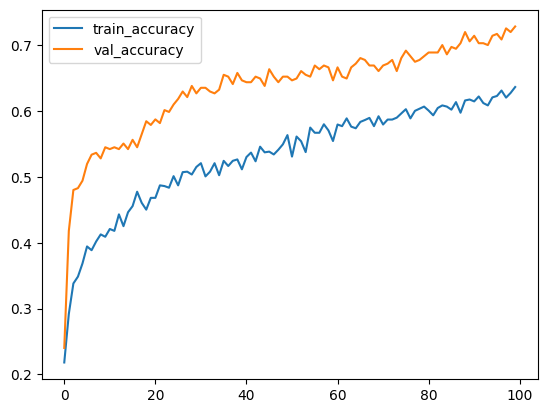

In [ ]:
plt.plot(history.history["accuracy"],label="train_accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

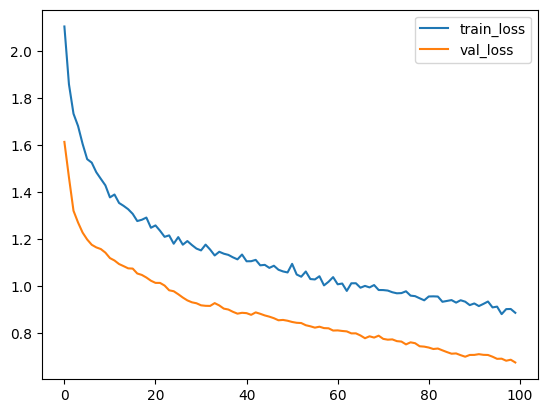

In [ ]:
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

In [ ]:
y_prediction=loaded_model.predict(test_data)

354/354 [==============================] - 6s 13ms/step


In [ ]:
y_prediction

array([[7.89298236e-01, 2.40324438e-02, 2.04280182e-03, 4.98522422e-05,
        1.84576645e-01],
       [9.51161385e-01, 5.54171298e-03, 1.96689200e-02, 7.12918118e-04,
        2.29151510e-02],
       [3.60467613e-01, 3.92950296e-01, 1.43304601e-01, 1.52459869e-03,
        1.01752885e-01],
       ...,
       [3.89600219e-03, 5.44054545e-02, 1.27610758e-01, 5.59178239e-04,
        8.13528657e-01],
       [6.97859764e-01, 8.28843191e-02, 7.70478547e-02, 2.85536912e-03,
        1.39352694e-01],
       [8.69034380e-02, 2.42388342e-02, 1.16064973e-01, 8.43474176e-04,
        7.71949232e-01]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_prediction,axis=1)

y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 4, 1,
       4, 1, 4, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 4, 0, 1, 2, 0, 1, 0,
       2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 4, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 4, 4, 0, 1, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 0, 2, 4, 4, 2, 2, 1, 2, 2, 4, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 4,
       0, 2, 0, 1, 1, 1, 2, 2, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 4, 4, 2, 4, 4, 4,
       4, 4, 4, 4, 1, 4, 2, 4, 4, 2, 4, 4, 1, 2, 4, 4, 2, 4, 4, 4, 4, 0,
       1, 2, 4, 4, 2, 1, 4, 4, 4, 0, 4, 4, 4, 4, 4,

In [ ]:
cm=confusion_matrix(test_data.classes,y_pred)
cm

array([[69,  2,  1,  2,  8],
       [10, 42, 10,  0,  7],
       [ 6, 12, 34,  0,  6],
       [ 0,  0,  0, 30,  0],
       [11,  9, 12,  0, 83]])

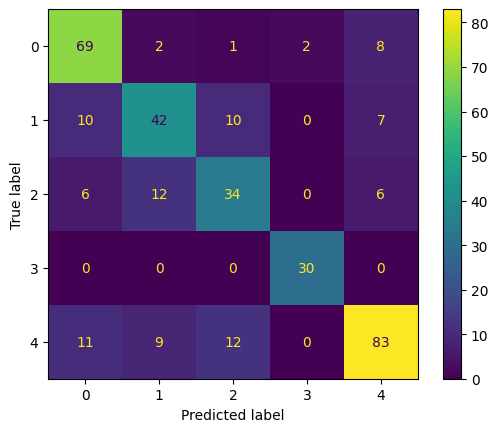

In [ ]:
cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

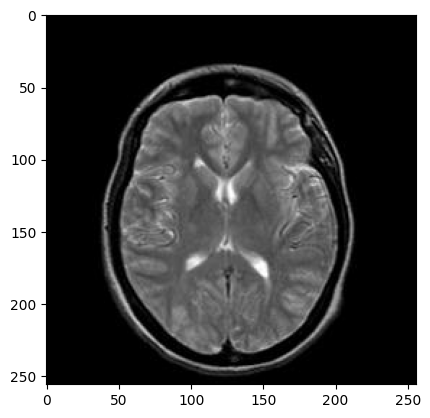

In [ ]:
I_test=imread(r"/content/drive/MyDrive/Datasets/Brain Tumour detection/Final Datasets/test/cerebrovascular brain/cerebrovascular brain (1001).JPG")
plt.imshow(I_test)

In [ ]:
I_test=np.array(I_test).astype('float32')/255
I_test=transform.resize(I_test,(224,224,3))
I_test=np.expand_dims(I_test,axis=0)

In [ ]:
prediction=loaded_model.predict(I_test)
result=np.argmax(prediction)
result

1/1 [==============================] - 1s 1s/step


4